In [1]:
# Numpy
import numpy as np

# xarray
import xarray as xr

# matplotlib
import matplotlib.pyplot as plt
from IPython.display import HTML

# time
import datetime
from cftime import num2date

import cmocean  # for nice oceanographic colormaps

#JUPYTER notebook magics
%matplotlib inline 

In [2]:
%%bash

# We tune the BBM-dynamics using this module
/home/nextsimdg/build/nextsim --help-config BBMDynamics

BBMDynamics

BBMDynamics.C
numeric    range: -∞—0 [None] (default = -20)
The compaction parameter C

BBMDynamics.nu
numeric    range: -∞—0 [None] (default = 0.333333)
Poisson's ratio, 𝜈

BBMDynamics.young
numeric    range: 0—∞ Pa (default = 5.96e+08)
Young's modulus, Y

BBMDynamics.P0
numeric    range: 0—∞ Pa (default = 10000)
Ice strength scaling parameter

BBMDynamics.lambda0
numeric    range: 0—∞ s (default = 1e+07)
Undamaged relaxation time scale

BBMDynamics.alpha
numeric    range: 2—∞ [None] (default = 5)
Damage parameter

BBMDynamics.exppmax
numeric    range: 0—2 [None] (default = 1.5)
Exponent for thickness scaling of P_{max}

BBMDynamics.mu
numeric    range: 0—1 [None] (default = 1.5)
Internal friction coefficient, 𝜇

BBMDynamics.namx
numeric    range: 0—∞ Pa (default = 1.5)
Maximum compressive strength (at the lab scale)

BBMDynamics.clab
numeric    range: 0—∞ Pa (default = 2e+06)
Cohesion (at the lab scale)

BBMDynamics.nsteps
numeric    range: 1—∞ [No unit] (default = 120)


In [3]:
%%bash

# Run the model with the config file for a realistic run
time /home/nextsimdg/build/nextsim --config-file config_files/config_25km_NH.cfg

2010-01-01T00:00:00Z
2010-01-01T00:20:00Z
2010-01-01T00:40:00Z
2010-01-01T01:00:00Z
2010-01-01T01:20:00Z
2010-01-01T01:40:00Z
2010-01-01T02:00:00Z
2010-01-01T02:20:00Z
2010-01-01T02:40:00Z
2010-01-01T03:00:00Z
2010-01-01T03:20:00Z
2010-01-01T03:40:00Z
2010-01-01T04:00:00Z
2010-01-01T04:20:00Z
2010-01-01T04:40:00Z
2010-01-01T05:00:00Z
2010-01-01T05:20:00Z
2010-01-01T05:40:00Z
2010-01-01T06:00:00Z
2010-01-01T06:20:00Z
2010-01-01T06:40:00Z
2010-01-01T07:00:00Z
2010-01-01T07:20:00Z
2010-01-01T07:40:00Z
2010-01-01T08:00:00Z
2010-01-01T08:20:00Z
2010-01-01T08:40:00Z
2010-01-01T09:00:00Z
2010-01-01T09:20:00Z
2010-01-01T09:40:00Z
2010-01-01T10:00:00Z
2010-01-01T10:20:00Z
2010-01-01T10:40:00Z
2010-01-01T11:00:00Z
2010-01-01T11:20:00Z
2010-01-01T11:40:00Z
2010-01-01T12:00:00Z
2010-01-01T12:20:00Z
2010-01-01T12:40:00Z
2010-01-01T13:00:00Z
2010-01-01T13:20:00Z
2010-01-01T13:40:00Z
2010-01-01T14:00:00Z
2010-01-01T14:20:00Z
2010-01-01T14:40:00Z
2010-01-01T15:00:00Z
2010-01-01T15:20:00Z
2010-01-01T15


real	1m55.465s
user	12m34.949s
sys	0m2.594s


In [4]:
# Load the NetCDF file
ds = xr.open_dataset("25km_NH.diagnostic.nc", group="/data")
print(ds)

# We (still) need to fetch the mask from the init file
mask = xr.open_dataset("/home/data-nextsim-workshop2025/nextsimdg/demo-realistic/init_25km_NH.nc", group="/data")['mask']
land = np.where(mask == 0, 1, np.nan)  # 1 = land, nan = ocean

<xarray.Dataset>
Dimensions:       (time: 24, ydim: 121, xdim: 154, dg_comp: 6, yvertex: 122,
                   xvertex: 155, ncoords: 2)
Coordinates:
  * time          (time) float64 1.262e+09 1.262e+09 ... 1.262e+09 1.262e+09
Dimensions without coordinates: ydim, xdim, dg_comp, yvertex, xvertex, ncoords
Data variables:
    cice          (time, ydim, xdim, dg_comp) float64 ...
    coords        (yvertex, xvertex, ncoords) float64 ...
    damage        (time, ydim, xdim) float64 ...
    grid_azimuth  (time, ydim, xdim) float64 ...
    hice          (time, ydim, xdim, dg_comp) float64 ...
    latitude      (time, ydim, xdim) float64 ...
    longitude     (time, ydim, xdim) float64 ...
    shear         (time, ydim, xdim) float64 ...
    u             (time, ydim, xdim) float64 ...
    v             (time, ydim, xdim) float64 ...


In [5]:
# Create sensible dates to use and pick a time slice to use
time = ds['time']
time_vals = num2date(time.values, units='seconds since 1970-01-01', calendar='gregorian')

time_index = 23

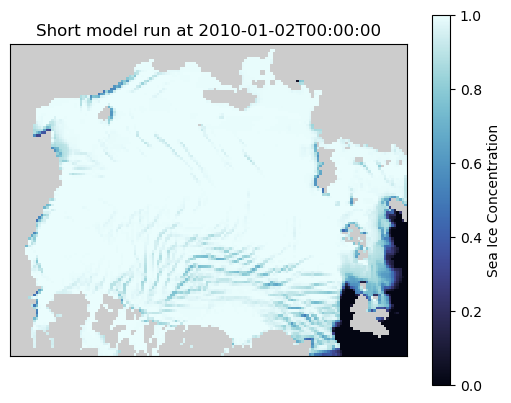

In [6]:
# NB - we need to pick the first DG component, as well as a time slice
var = ds['cice'].isel(time=time_index).isel(dg_comp=0)

plt.figure()
p = plt.pcolormesh(var, shading='auto', cmap='cmo.ice', vmin=0, vmax=1)
plt.gca().set_aspect('equal')

plt.colorbar(p, label='Sea Ice Concentration', orientation='vertical')

plt.pcolormesh(land, shading='auto', cmap='Pastel2', vmin=0, vmax=1)

plt.title(f"Short model run at {time_vals[time_index].isoformat()}")

plt.xticks([])
plt.yticks([])
plt.show()

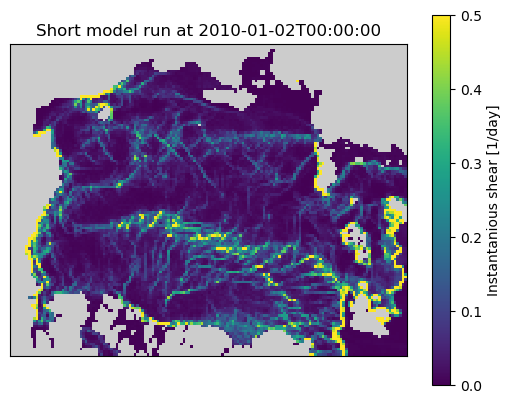

In [7]:
var = ds['shear'].isel(time=time_index) * 24*3600

plt.figure()
p = plt.pcolormesh(var, shading='auto', cmap='viridis', vmin=0, vmax=0.5)
plt.gca().set_aspect('equal')
plt.colorbar(p, label='Instantanious shear [1/day]', orientation='vertical')

plt.pcolormesh(land, shading='auto', cmap='Pastel2', vmin=0, vmax=1)

plt.title(f"Short model run at {time_vals[time_index].isoformat()}")

plt.xticks([])
plt.yticks([])
plt.show()

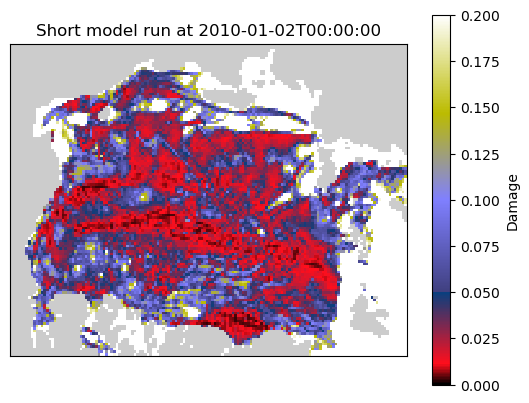

In [8]:
var = ds['damage'].isel(time=time_index)

plt.figure()
p = plt.pcolormesh(var, shading='auto', cmap='gist_stern', vmin=0, vmax=0.2)
plt.gca().set_aspect('equal')
plt.colorbar(p, label='Damage', orientation='vertical')

plt.pcolormesh(land, shading='auto', cmap='Pastel2', vmin=0, vmax=1)

plt.title(f"Short model run at {time_vals[time_index].isoformat()}")

plt.xticks([])
plt.yticks([])
plt.show()

In [9]:
ds.close()